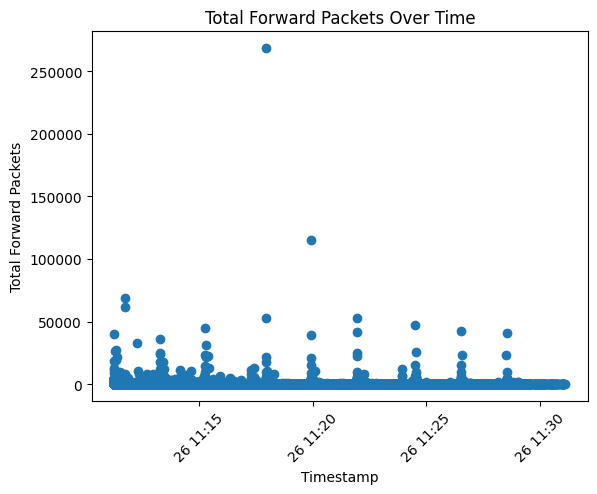

In [20]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

chunk_size = 120000  # Adjust as necessary to test with more rows
chunks = []

# Specify the format for the datetime conversion
date_format = '%d/%m/%Y%H:%M:%S'

for chunk in pd.read_csv('data2.csv', chunksize=chunk_size):

    # Convert 'Timestamp' column to datetime with the specified format
    chunk['Timestamp'] = pd.to_datetime(chunk['Timestamp'], format=date_format)
    
    # Set 'Timestamp' as the index
    chunk.set_index('Timestamp', inplace=True)
    chunks.append(chunk['Total.Fwd.Packets'])
    break  # Only process the first chunk

# Concatenate the list into a single DataFrame
time_series = pd.concat(chunks)

if not time_series.empty:
    # Plotting as a scatter plot instead
    plt.scatter(time_series.index, time_series.values)
    plt.title('Total Forward Packets Over Time')
    plt.xlabel('Timestamp')
    plt.ylabel('Total Forward Packets')
    plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
    plt.show()
else:
    print("The DataFrame is empty.")


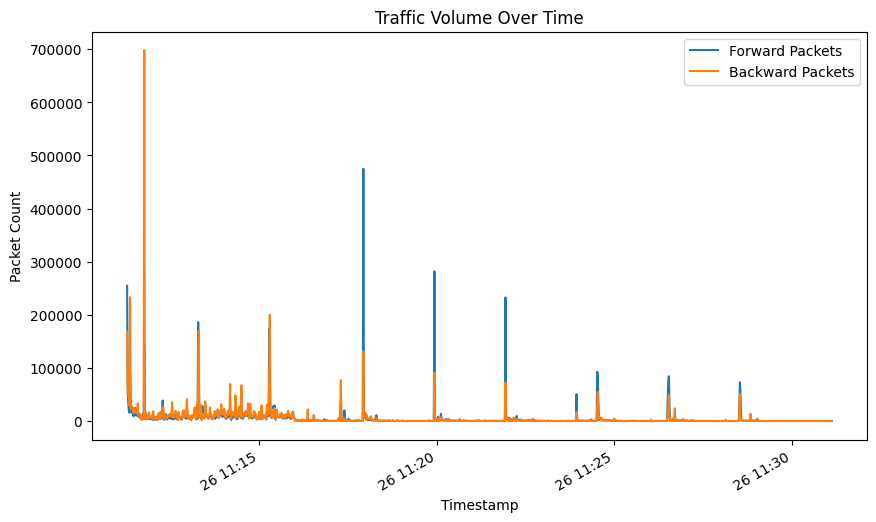

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

chunks = []
chunk_size = 120000  # Adjust chunk size based on your system's memory

for chunk in pd.read_csv('data2.csv', chunksize=chunk_size):
    chunk['Timestamp'] = pd.to_datetime(chunk['Timestamp'], format='%d/%m/%Y%H:%M:%S')
    chunks.append(chunk[['Timestamp', 'Total.Fwd.Packets', 'Total.Backward.Packets']].groupby('Timestamp').sum())
    break

traffic_volume_df = pd.concat(chunks)

traffic_volume_df.plot(figsize=(10, 6))
plt.title('Traffic Volume Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Packet Count')
plt.legend(['Forward Packets', 'Backward Packets'])
plt.show()


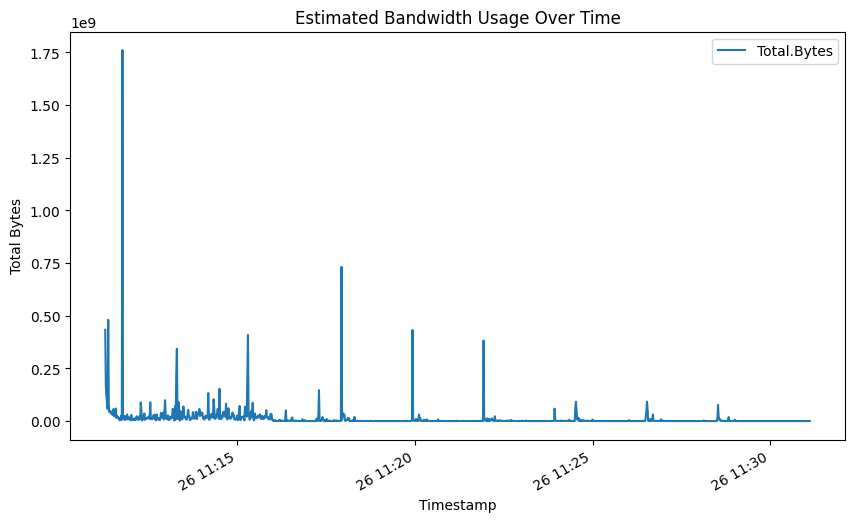

In [24]:
chunks = []

for chunk in pd.read_csv('data2.csv', chunksize=chunk_size):
    chunk['Timestamp'] = pd.to_datetime(chunk['Timestamp'], format='%d/%m/%Y%H:%M:%S')
    chunk['Total.Bytes'] = chunk['Total.Length.of.Fwd.Packets'] + chunk['Total.Length.of.Bwd.Packets']
    chunks.append(chunk[['Timestamp', 'Total.Bytes']].groupby('Timestamp').sum())
    break

bandwidth_usage_df = pd.concat(chunks)

bandwidth_usage_df.plot(figsize=(10, 6))
plt.title('Estimated Bandwidth Usage Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Total Bytes')
plt.show()


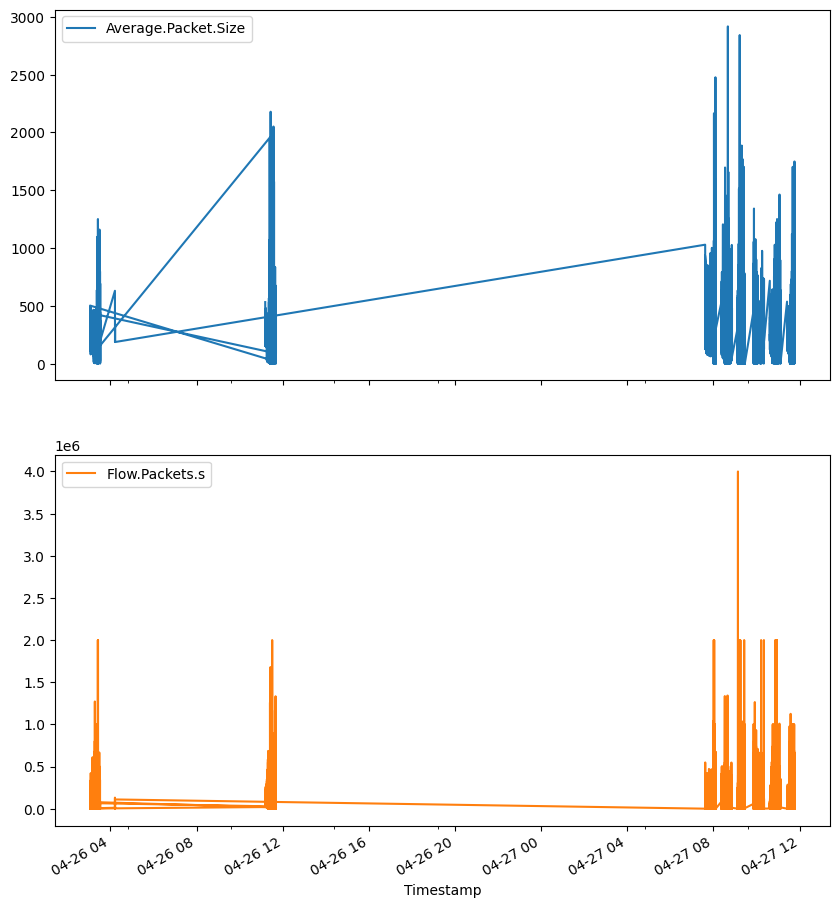

In [25]:
chunks = []

for chunk in pd.read_csv('data2.csv', chunksize=chunk_size):
    chunk['Timestamp'] = pd.to_datetime(chunk['Timestamp'], format='%d/%m/%Y%H:%M:%S')
    chunks.append(chunk[['Timestamp', 'Average.Packet.Size', 'Flow.Packets.s']].groupby('Timestamp').mean())

traffic_patterns_df = pd.concat(chunks)

traffic_patterns_df.plot(subplots=True, figsize=(10, 12))
plt.show()


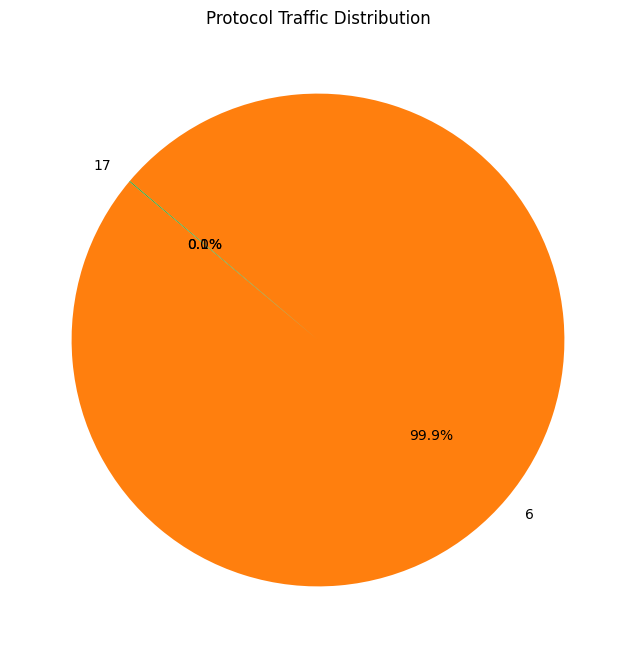

In [26]:
chunks = []

for chunk in pd.read_csv('data2.csv', chunksize=chunk_size):
    chunk['Total.Bytes'] = chunk['Total.Length.of.Fwd.Packets'] + chunk['Total.Length.of.Bwd.Packets']
    chunks.append(chunk[['Protocol', 'Total.Bytes']])

protocol_usage_df = pd.concat(chunks)
protocol_traffic = protocol_usage_df.groupby('Protocol')['Total.Bytes'].sum()

protocol_traffic.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(8, 8))
plt.title('Protocol Traffic Distribution')
plt.ylabel('')
plt.show()


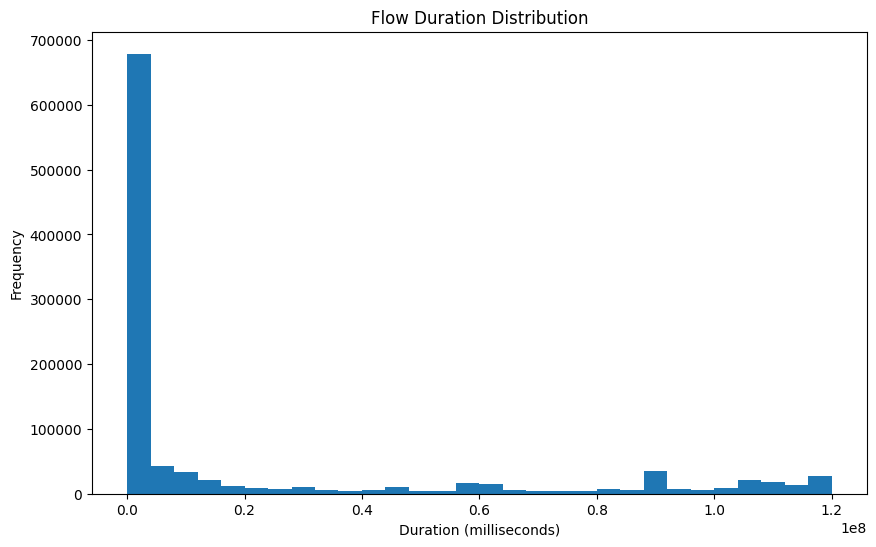

In [27]:
chunks = []

for chunk in pd.read_csv('data2.csv', chunksize=chunk_size):
    chunks.append(chunk['Flow.Duration'])

flow_duration_df = pd.concat(chunks)

flow_duration_df.plot(kind='hist', bins=30, figsize=(10, 6))
plt.title('Flow Duration Distribution')
plt.xlabel('Duration (milliseconds)')
plt.ylabel('Frequency')
plt.show()
